# <center> Graphs for Ridge Regression
    
This notebook loads the results for Ridge regression and plot/save the different graphs.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scripts.utils import simu_block_ridge
import warnings
warnings.filterwarnings("ignore")

### Configuration for graphics

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

### Load data

In [3]:
#puiss = 5
puiss = 10

In [4]:
mean_sgd = np.load('results/RIDGE/mean_sgd_alpha{}.npy'.format(puiss))
mean_uni = np.load('results/RIDGE/mean_uni_alpha{}.npy'.format(puiss))
mean_bia = np.load('results/RIDGE/mean_bia_alpha{}.npy'.format(puiss))
mean_unb = np.load('results/RIDGE/mean_unb_alpha{}.npy'.format(puiss))

In [5]:
n_samples = 10000   # number of samples
n_features = 250    # dimension of the problem
# Simulate data for regression
seed=0
noise=0.01
block_size=1

X,y,coeff=simu_block_ridge(seed=seed,n_samples=n_samples,n_features=n_features,
                     puiss=puiss,block_size=block_size,noise=noise)

𝜆 = 1/n_samples          #regularization parameter
G = ((X.T)@X)/n_samples  # Gram matrix
A = G + 𝜆*np.eye(n_features)
B = ((X.T)@y)/n_samples
ridge = np.linalg.solve(a=A ,b=B)

data_opt = np.sum((y-X.dot(ridge))**2)/(2*n_samples)
reg_opt = (𝜆/2) * sum(ridge**2)
loss_opt = data_opt + reg_opt
print('data_opt:',data_opt)
print('reg_opt :',reg_opt)
print(loss_opt)

data_opt: 5.008076316024481e-05
reg_opt : 1.704688779421011e-05
6.712765095445493e-05


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


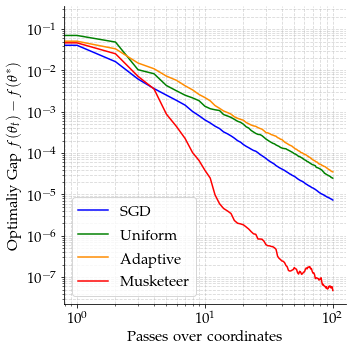

In [6]:
#plt.figure()
fig,ax = plt.subplots(figsize=(5,5))
plt.plot(mean_sgd-loss_opt,color='b',label='SGD')
plt.plot(mean_uni-loss_opt,color='g',label='Uniform')
plt.plot(mean_unb-loss_opt,color='darkorange',label='Adaptive')
plt.plot(mean_bia-loss_opt,color='r',label='Musketeer')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'Optimaliy Gap $f(\theta_t)-f(\theta^*)$',fontsize=15)
plt.xlabel('Passes over coordinates',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.legend(loc='lower left',fontsize=15)
#plt.legend(loc='upper right',fontsize=15)
plt.grid(linestyle='--',which='both',alpha=0.5)
#plt.title('Ridge Regression',fontsize=15)
plt.tight_layout()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
filename = 'ridge_a10.pdf'
#plt.savefig(filename,bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()